# Importing Libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os


In [6]:
pd.set_option('display.max_columns', 100) # max column to be shown

# plot style

In [10]:
print(plt.style.available) # to choose plot style


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


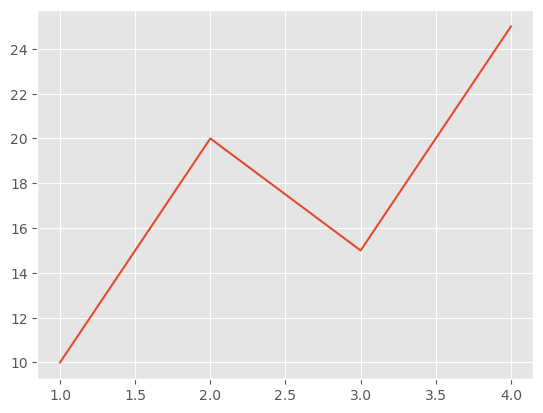

In [12]:
#test ggplot style
plt.style.use("ggplot")
plt.plot([1, 2, 3, 4], [10, 20, 15, 25])
plt.show()

In [14]:
plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Load Dataset and Perform Initial Processing

In [17]:
file_path = r"C:\Users\Sara\Downloads\tweet\tweets.csv"
print(os.path.exists(file_path))   # should be True
wordle_tweet=pd.read_csv(file_path)

True


In [18]:
wordle_tweet.shape

(1178454, 5)

In [19]:
wordle_tweet.dtypes

wordle_id          int64
tweet_id           int64
tweet_date        object
tweet_username    object
tweet_text        object
dtype: object

## Ensure Proper Date Format for tweet_date

In [21]:
wordle_tweet['tweet_date']=pd.to_datetime(wordle_tweet['tweet_date'])
wordle_tweet.dtypes

wordle_id                       int64
tweet_id                        int64
tweet_date        datetime64[ns, UTC]
tweet_username                 object
tweet_text                     object
dtype: object

In [22]:
wordle_tweet['tweet_date'] = pd.to_datetime(wordle_tweet['tweet_date']).dt.floor('d')

## Parsing Wordle Results from Tweet Text

In [24]:
wordle_tweet['wordle_level']=wordle_tweet['tweet_text'].str[:10]
wordle_tweet['No_trials']=wordle_tweet['tweet_text'].str[11]

In [25]:
wordle_tweet.dtypes

wordle_id                       int64
tweet_id                        int64
tweet_date        datetime64[ns, UTC]
tweet_username                 object
tweet_text                     object
wordle_level                   object
No_trials                      object
dtype: object

# Insights from the Data (Q&A)


## How many Wordle tweets are posted per day?

In [31]:
tweets_per_day=wordle_tweet.groupby('tweet_date').size()
tweets_per_day

tweet_date
2022-01-16 00:00:00+00:00    2730
2022-01-17 00:00:00+00:00    2830
2022-01-18 00:00:00+00:00    2365
2022-01-19 00:00:00+00:00    2121
2022-01-20 00:00:00+00:00    2694
                             ... 
2022-11-17 00:00:00+00:00    3203
2022-11-18 00:00:00+00:00    2826
2022-11-19 00:00:00+00:00    3308
2022-11-20 00:00:00+00:00    3054
2022-11-21 00:00:00+00:00     144
Length: 308, dtype: int64

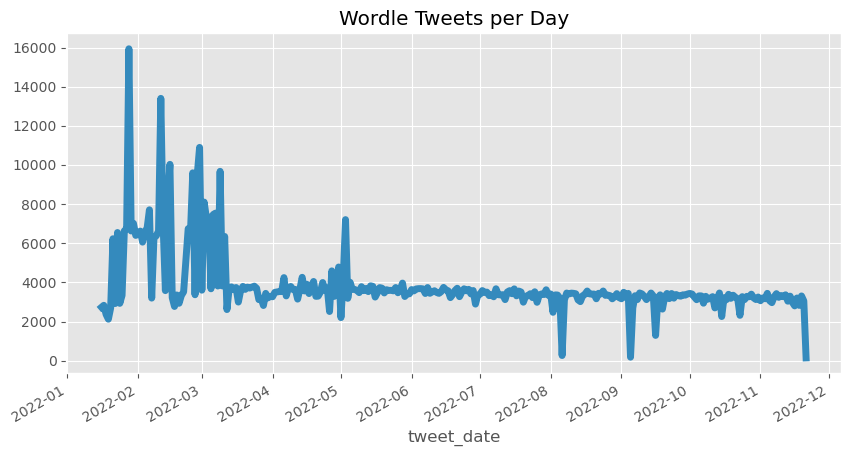

In [81]:
tweets_per_day.plot(figsize=(10,5), title='Wordle Tweets per Day',
              color=color_pal[1], lw=5)
plt.show()

## What days of the week see the most tweets?

In [40]:
wordle_tweet['day_name'] = wordle_tweet['tweet_date'].dt.day_name()

In [42]:
Tweets_per_Day_of_Week=wordle_tweet.groupby('day_name').size()
Tweets_per_Day_of_Week

day_name
Friday       190451
Monday       165554
Saturday     157782
Sunday       166726
Thursday     165137
Tuesday      159604
Wednesday    173200
dtype: int64

<Axes: title={'center': 'Tweets per Day of the Week'}, xlabel='day_name'>

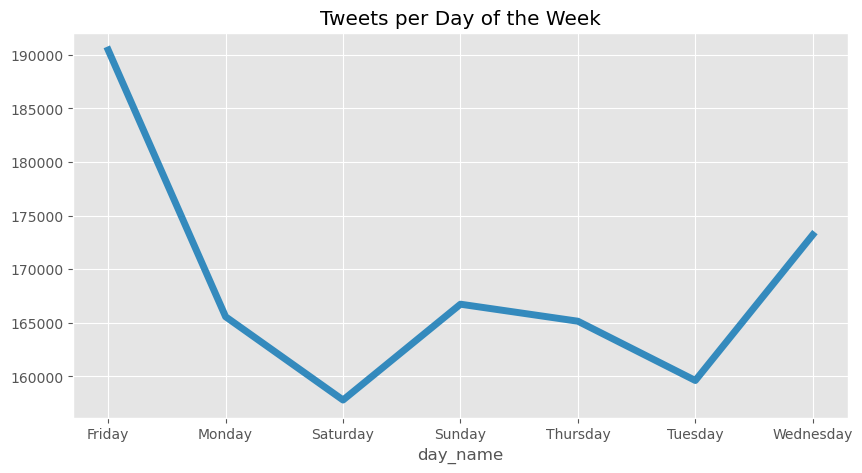

In [44]:
Tweets_per_Day_of_Week.plot(figsize=(10, 5),title="Tweets per Day of the Week",lw='5',color=color_pal[1])

## What is the distribution of number of attempts (n_attempts) people need to solve Wordle?

In [47]:
wordle_tweet.dtypes

wordle_id                       int64
tweet_id                        int64
tweet_date        datetime64[ns, UTC]
tweet_username                 object
tweet_text                     object
wordle_level                   object
No_trials                      object
day_name                       object
dtype: object

In [49]:
No_trials_vs_level=wordle_tweet.groupby('wordle_level')['No_trials'].value_counts().unstack()
No_trials_vs_level=pd.crosstab(wordle_tweet['wordle_level'],wordle_tweet['No_trials']).style.background_gradient(axis=1)
No_trials_vs_level

No_trials,2,3,4,5,6
wordle_level,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


## Does performance (attempts to solve) change over different Wordle IDs (puzzles)?

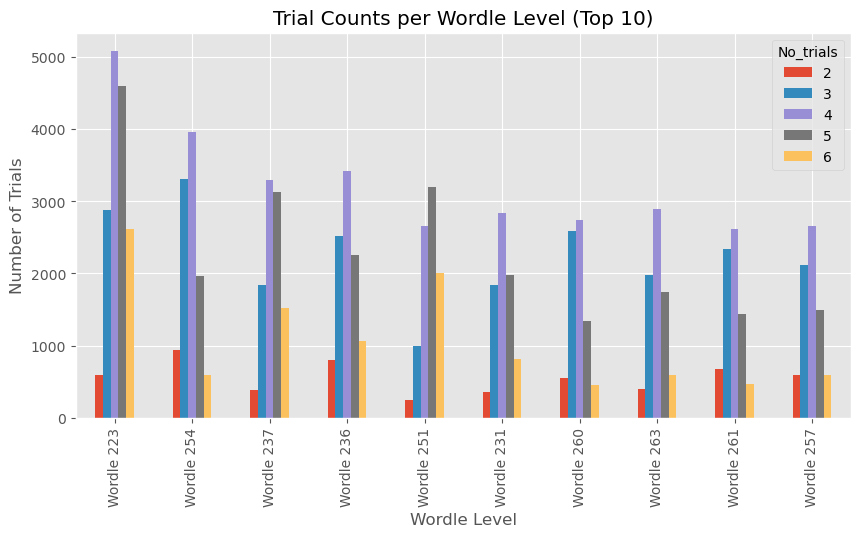

In [51]:
Performance_by_Wordle=wordle_tweet.groupby('wordle_level')['No_trials'].value_counts().unstack()
top10_levels = Performance_by_Wordle.sum(axis=1).nlargest(10).index
No_trials_vs_level_top10 = Performance_by_Wordle.loc[top10_levels]
No_trials_vs_level_top10.plot(
    kind='bar',
    figsize=(10, 5),
    title="Trial Counts per Wordle Level (Top 10)",
    lw=5,
    color=color_pal
)
plt.xlabel('Wordle Level')
plt.ylabel('Number of Trials')
plt.show()

## What is the typical number of attempts needed to solve it?

In [67]:
No_attemps=wordle_tweet['No_trials'].value_counts().sort_index()
No_attemps

No_trials
2     69260
3    275860
4    405714
5    292143
6    135477
Name: count, dtype: int64

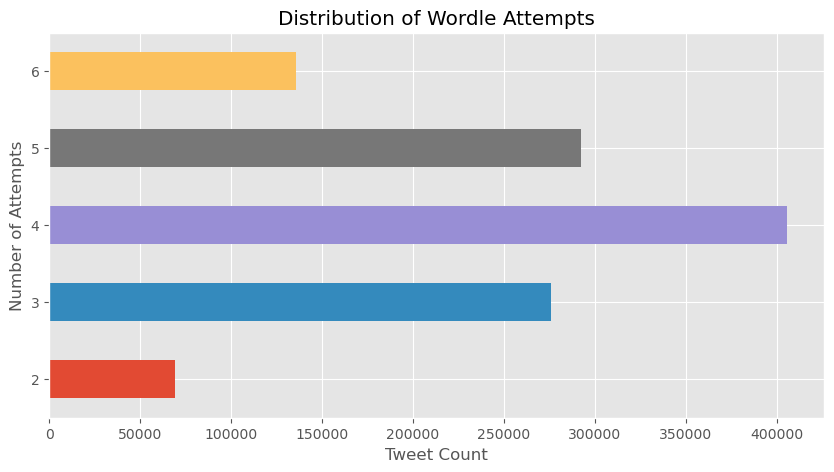

In [83]:
No_attemps.plot(figsize=(10,5),color=color_pal,kind='barh')
plt.xlabel('Tweet Count')
plt.ylabel('Number of Attempts')
plt.title('Distribution of Wordle Attempts') 
plt.show()
